**"Credit Scoring Dataset"**

• Description: Contains individual’s financial history, credit usage, loan details, and whether they defaulted on loans.

• Use Case: Use Linear Regression to predict continuous variables such as credit score, and Logistic Regression to classify individuals into "default" or "no default" categories.


**1. Objective**


*Overview:*   Using the creditcard.csv dataset to discover some insights that can inform smarter financial decisions.

*Goal:* Our goal is to explore how statistical concepts and machine learning to analyze a credit card dataset. Armed with techniques like Probability, Linear Regression, and Logistic Regression, we're poised to predict crucial outcomes such as ***credit scores*** and ***defaults.***

**2. Dataset Preparation**

*Explanation:* For this case study, I'll be working with a creditcard.csv as my dataset containing individuals' financial history, credit usage, loan details, and their credit card default status.
Independent Variables:
Time,
V1-V28,
Amount

Dependent Variable:
Class

***So I'll use the independent variables (Time, V1-V28, and Amount) to predict the dependent variable (Class).***

Preprocessing: Before analysis, standard preprocessing steps such as handling missing values, scaling numerical features, encoding categorical variables, and feature selection will be done (if necessary). I'll split the dataset into training and testing sets to evaluate the models effectively as well.

*Importing libraries*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, auc, roc_curve, confusion_matrix

In [ ]:
cd_data = pd.read_csv('creditcard.csv')
print(cd_data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

*Handling missing values*

In [ ]:
print (cd_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


*Encoding categorical values*

In [ ]:
cd_data_encoded = pd.get_dummies(cd_data)
print (cd_data_encoded.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

*Feature Selection*

In [ ]:
cd_data_dummies = pd.get_dummies(cd_data, drop_first=True)
cd_data_dummies['class'] = (cd_data['Class']>0).astype(int)

x_class = cd_data_dummies.drop(['Time', 'Amount', 'Class'], axis =1)
y_class = cd_data_dummies['class']

**3. Explanatory Data Analysis (EDA)**

*Probability and Statistics Concept*

In [ ]:
cd_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


*Visualization*

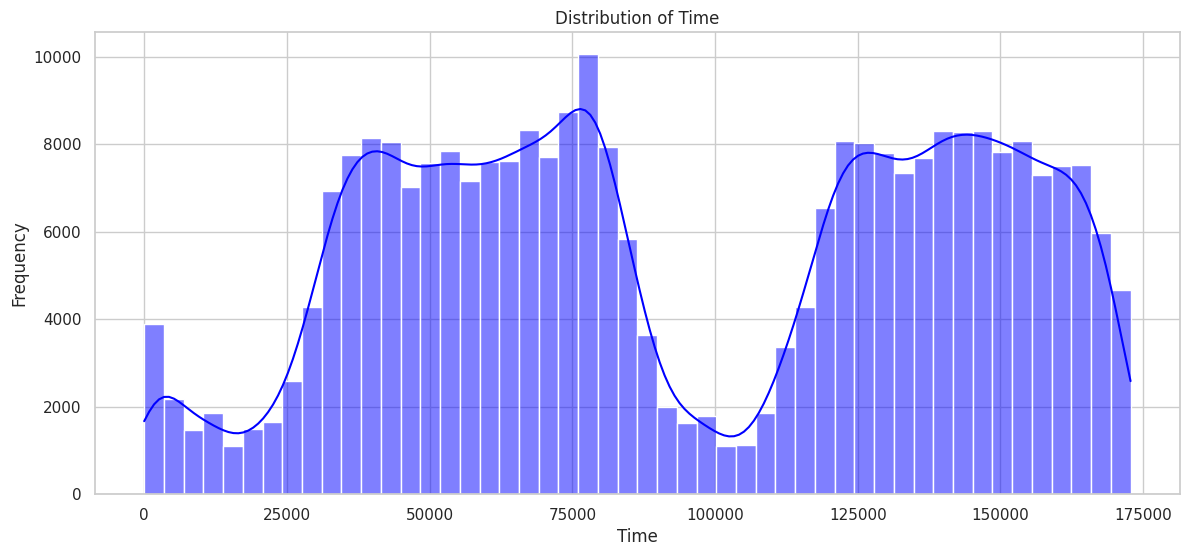

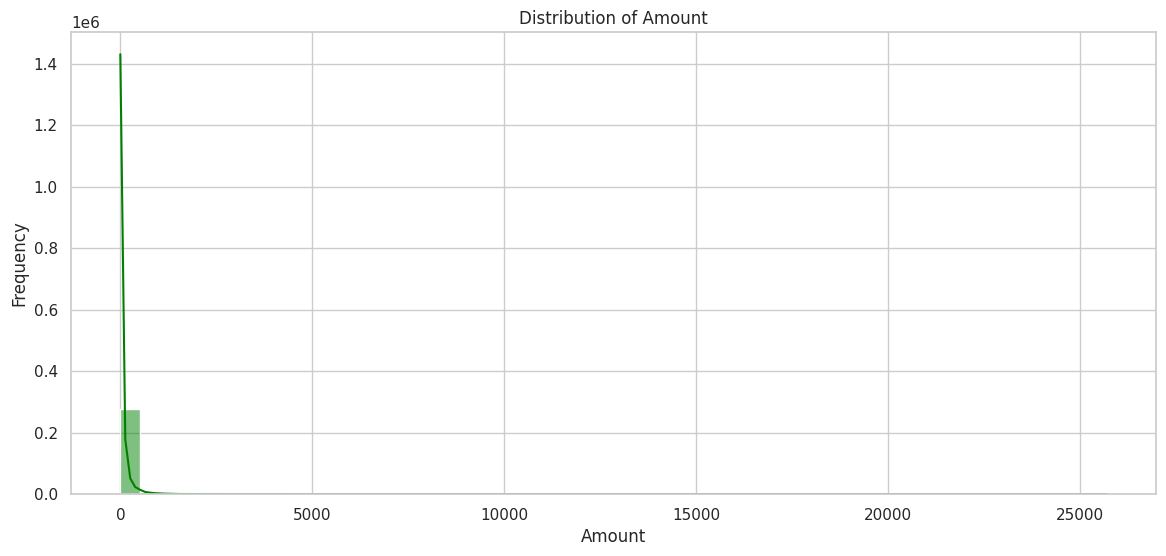

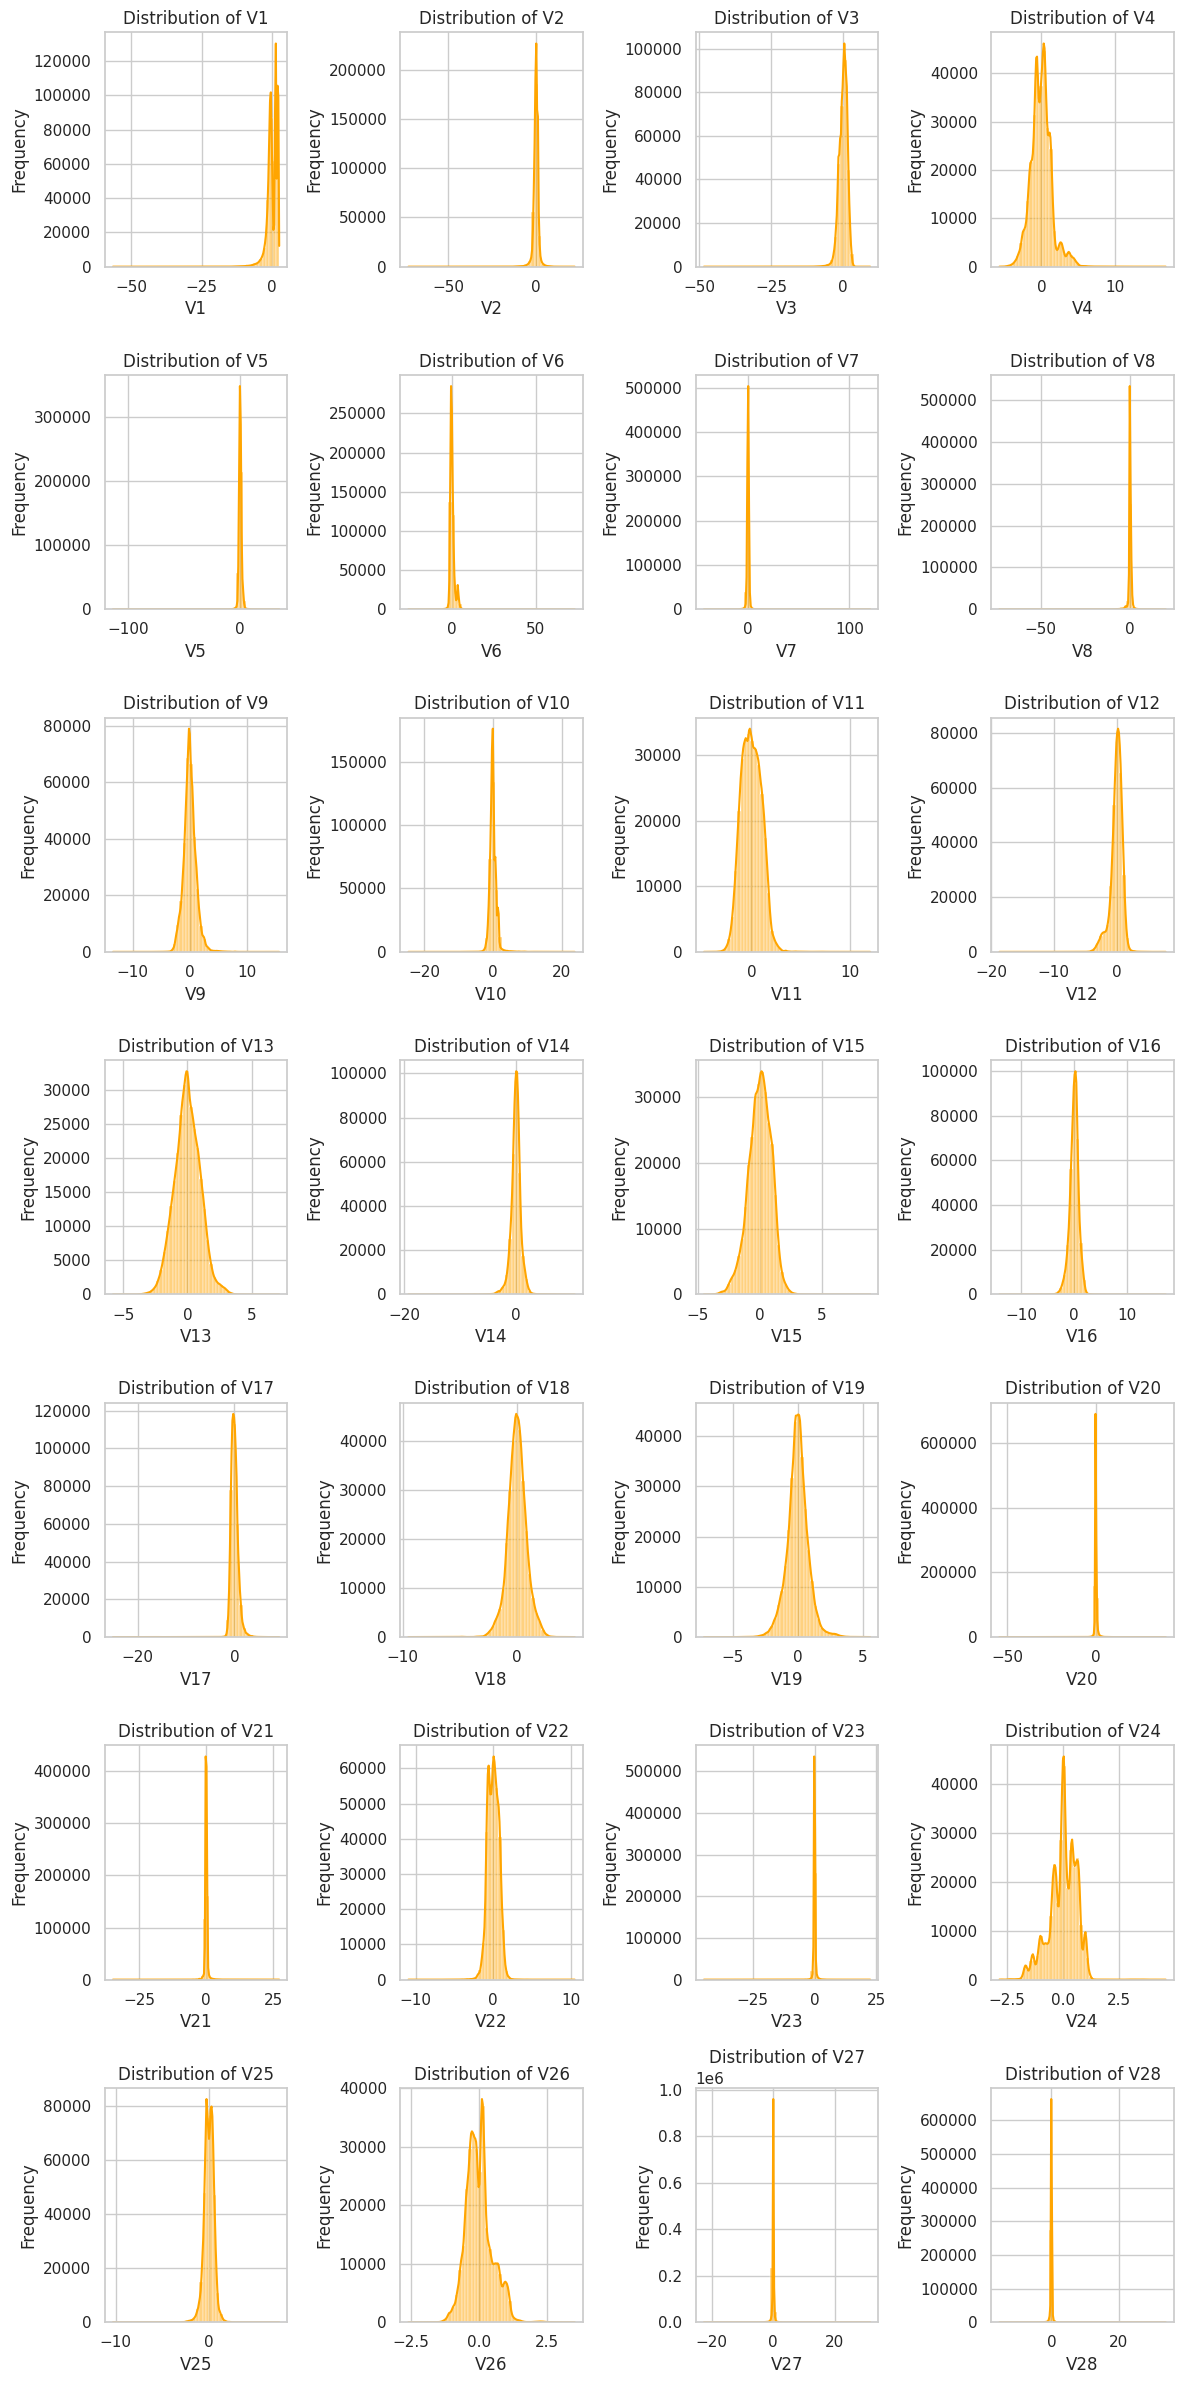

<ipython-input-41-25b281c6013f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=cd_data, palette='Set1')


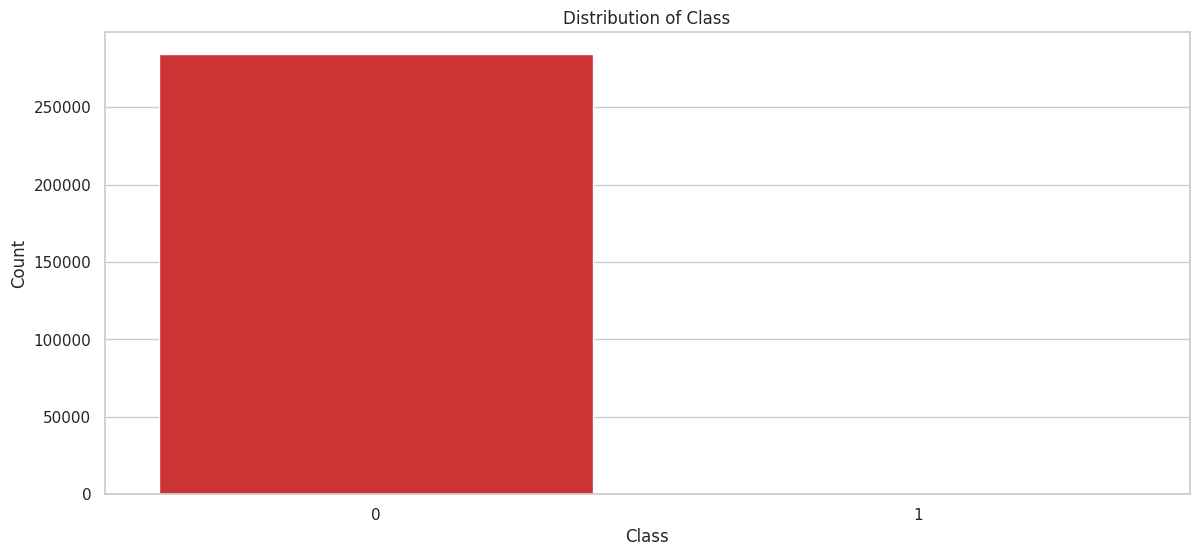

In [ ]:
sns.set(style ="whitegrid")

plt.figure(figsize=(14,6))
sns.histplot(cd_data['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14,6))
sns.histplot(cd_data['Amount'], bins=50, kde=True, color='green')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,24))
for i in range (1, 29):
  plt.subplot(7, 4, i)
  sns.histplot(cd_data[f'V{i}'], bins=50, kde=True, color='orange')
  plt.title(f'Distribution of V{i}')
  plt.xlabel(f'V{i}')
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))
sns.countplot(x='Class', data=cd_data, palette='Set1')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


4. Linear Regression Model

*Theory Recap*: According to our past lectures, linear regression is used to model the relationship between a dependent variable and one or more independent variables. In this case, linear regression will be used to predict continuous variables, such as credit scores, based on independent features like time, transaction amount, and the (V1-V28).

*Implementation*: First step is to start fitting a linear regression model to the dataset. Then, select the independent variables (features) and the dependent variable (credit score), split the dataset into training and testing sets, and then train the model on the training data.

Slope: -0.00029103835522820934
Intercept: 0.001729245759178389


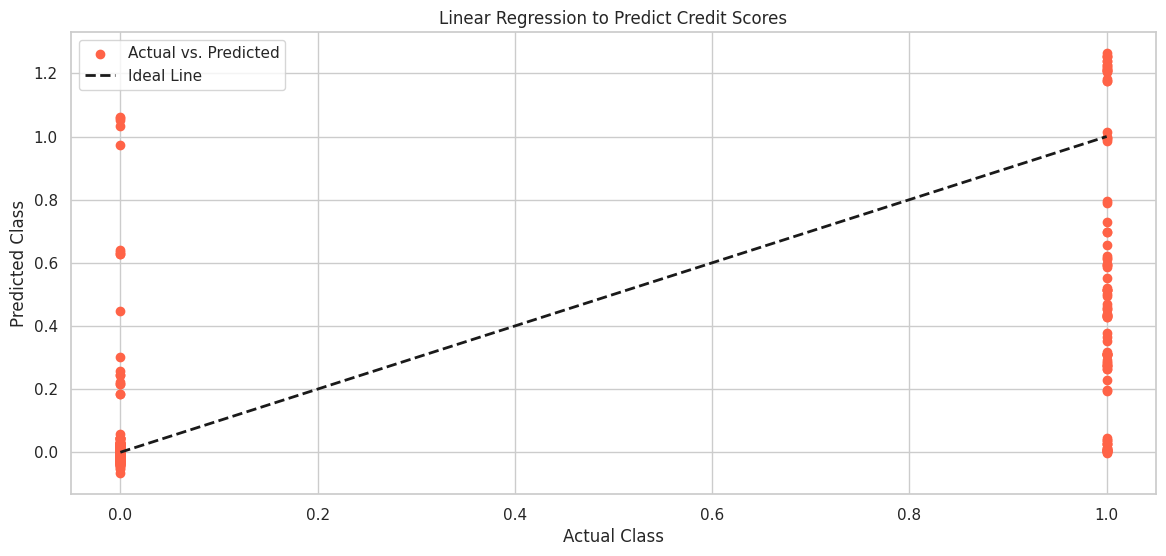

In [ ]:
x = pd.get_dummies(cd_data.drop(columns=['Class']))
y = cd_data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)
slope = model.coef_[0]
intercept = model.intercept_

print("Slope:", slope)
print("Intercept:", intercept)

y_pred = model.predict(x_test_scaled)

plt.figure(figsize=(14,6))
plt.scatter(y_test, y_pred, color='tomato', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2, label='Ideal Line')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title('Linear Regression to Predict Credit Scores')
plt.legend()
plt.show()

*Evaluation*

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R-squared:", r2)
print("Root Mean Squared Error", rmse)

R-squared: 0.5166663660896536
Root Mean Squared Error 0.02881177537567615


5. Logistic Regression

*Theory Recap*: According to our past lectures, logistic regression is used for binary classification problems where the dependent variable is categorical with two possible outcomes. In this case, I'll use logistic regression to classify individuals into "default" or "no default" categories based on their financial history and credit usage.  

*Implementation*: Also same with the linear regression: selecting the independent variables (features) and the deependent variable (default or no default), then split the dataset into training and testing sets and train the model on the training data.

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

*Evaluation*

In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print("ROC AUC:", roc_auc)
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)
print("Thresholds:", thresholds)


Accuracy: 0.9988764439450862
Confusion Matrix:
[[56855     9]
 [   55    43]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.44      0.57        98

    accuracy                           1.00     56962
   macro avg       0.91      0.72      0.79     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9800042062407406
False Positive Rate (FPR): [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.03432752e-05
 7.03432752e-05 8.79290940e-05 8.79290940e-05 8.79290940e-05
 8.79290940e-05 1.58272369e-04 1.58272369e-04 1.75858188e-04
 1.75858188e-04 1.93444007e-04 1.93444007e-04 2.46201463e-04
 2.46201463e-04 2.98958920e-04 2.98958920e-04 4.39645470e-04
 4.39645470e-04 4.57231289e-04 4.57231289e-04 4.92402926e-04
 4.92402926e-04 6.50675295e-04 6.50675295e-04 7.73776027e-04
 7.73776027e-04 7.91361846e-04 7.91361846e-04 1.17649128e-02
 1.17649128e-02 1.20462859e-0

6. Model Comparison and Selection

*Comparison of Linear and Logistic Regression:* I’ve compared the performance of the linear regression and logistic regression models based on their evaluation metrics.


*Decision-Making Process:* By weighing the strengths and limitations of each model, we can  decide on which model is better suited for our credit scoring dataset.


7. Conclusion and Insights


Using Linear Regression, we aimed to predict credit scores based on transaction time and amount. However, Linear Regression may not be the optimal model for predicting categorical outcomes like credit card fraud. Therefore, for tasks involving binary classification, such as predicting credit card fraud or default status, Logistic Regression is more suitable.

***Based on the results:***

**Accuracy:**
The Logistic Regression model achieved an accuracy of **99.89%**, indicating its effectiveness in classifiying transactions as fraudulent or non-fraudulent.

**Confusion Matrix:**
Out of 56,864 non-fraudulent transactions, the model identified 56,855 instances, demonstrating a high true negative rate. However, it identified ***only 43 out of 98 fraudulent transactions***, indicating room for improvement in detecting fraudulent activities.

**Classification Report:**
The precision for ***non-fraudulent transactions*** is nearly perfect at ***100%***, while the precision for ***fraudulent transactions*** is slightly lower at ***83%***, suggesting a low false positive rate but room for improvement in identifying fraudulent instances.


In conclusion, the applied statistical methods faciilitated decision-making in predicting credit scores and classifying individuals based on credit card default status.

8. References

Sources includes:

creditcard.csv dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

libraries such as pandas, NumPy, scikit-learn, matplotlib, and any additional resources that contribute to the analysis.